# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu, kilku punktów, prostych figur,
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie,
- transformacja Hougha w przestrzeni _ab_.

## Transformacja Hougha

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to **przestrzeń Hougha**. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ oraz θ, opisujące równanie prostej w postaci normalnej:
$$
  ρ=x⋅cos(θ)+y⋅sin(θ),
$$
gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha,
- pękowi prostych przechodzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha,
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych przechodzących przez ten punkt,
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych (ρ, θ),
- w ten sposób każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha.

Przestrzeń Hougha jest przestrzenią akumulacyjną, tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów należących do jednej prostej. Współrzędne (ρ, θ) tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów
1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

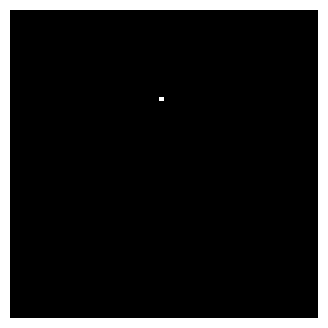

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'
fileNames = ["dom.png", "kwadraty.png", "lab112.png"]

for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects=True)
        open(fileName, 'wb').write(r.content)

im = np.zeros((64, 64), dtype=np.uint8)

# wybrany przykładowy punkt
im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')

2. Wykonaj transformację Hougha obrazu _im_. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory: _theta_ i _rho_ dla kolejnych punktów.
3. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą przygotowaną funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    plt.tight_layout()
    plt.show()

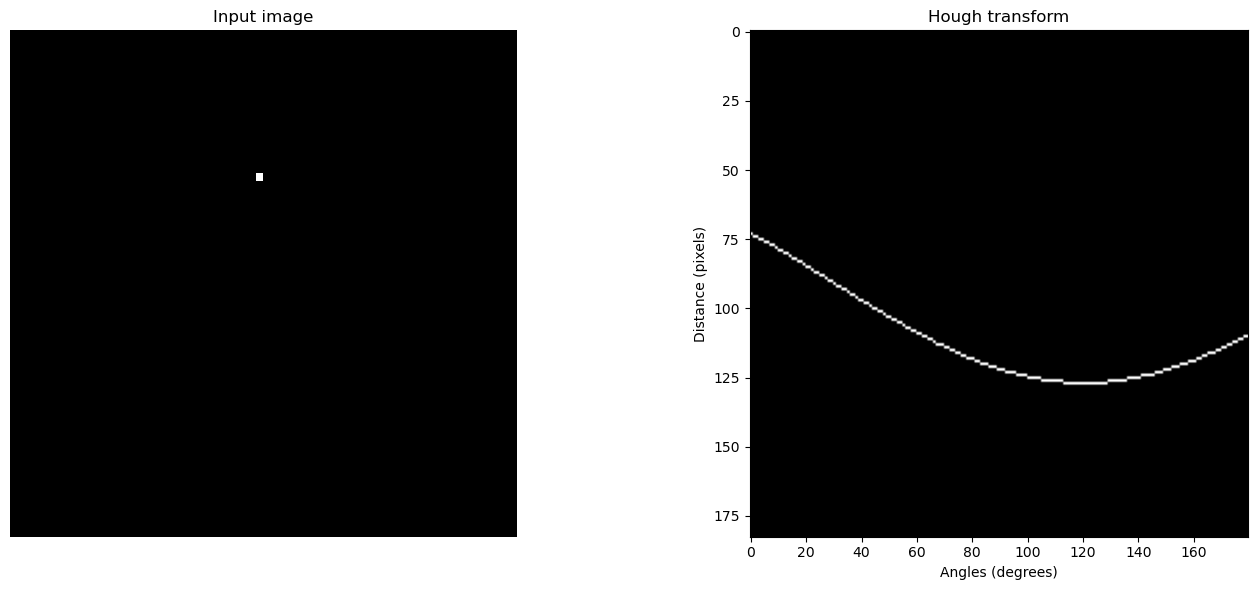

In [3]:
# transformata Hougha obrazu im 
H, theta, rho = hough_line(im)

# wyświetlmy wyniki
show_hough(H, im)


---

#### Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

Pojedynczy punkt w przestrzeni Hougha jest reprezentowany przez sinusoidalną krzywą.

---


4. Powtórz punkty 2-3, ale tym razem kliknij dwa punkty. Jak zmienia się przestrzeń Hougha?
5. Powtórz punkty 2-3, ale tym razem kliknij kilka punktów, starając się, aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha.
6. Poeksperymentuj z różnymi układami punktów.

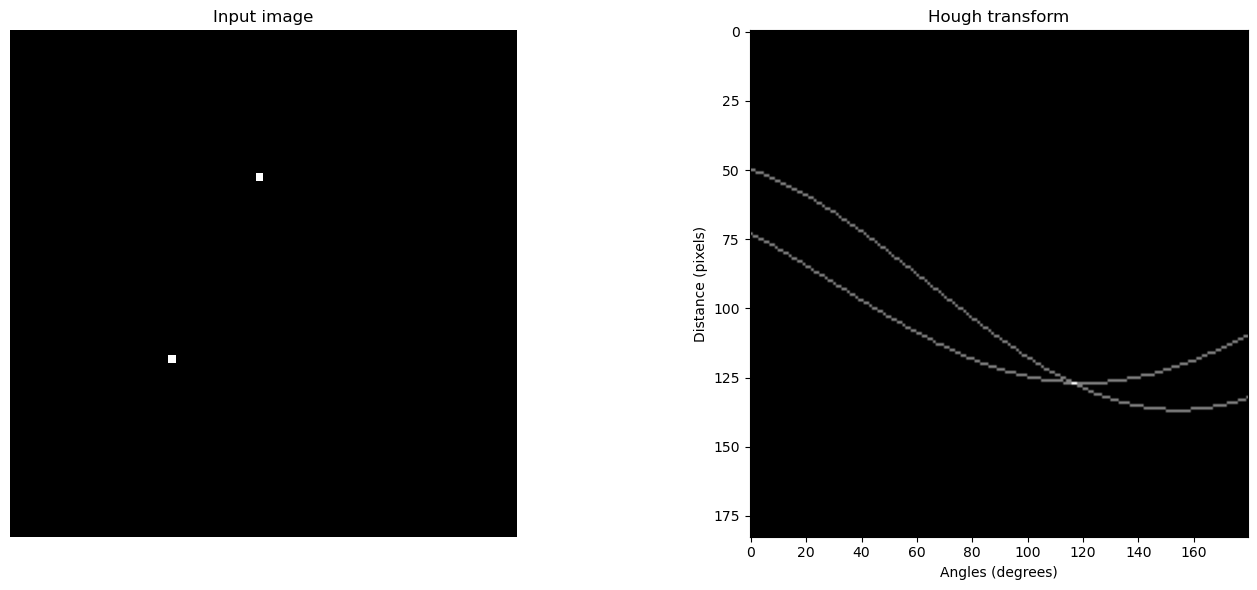

In [4]:
# dodatkowy punkt, zaznaczony razem z wcześniejszym
im[41, 20] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)


---

#### Jak zmienia się przestrzeń Hougha?

Po zaznaczeniu drugiego punktu wynikiem transformaty są dwie krzywe, które przecinają się w jednym punkcie - w tym właśnie punkcie odpowiedź jest "najsilniejsza", pozostałe fragmenty nie są aż tak jasne. Wydaje się to zgodne z teorią.

---


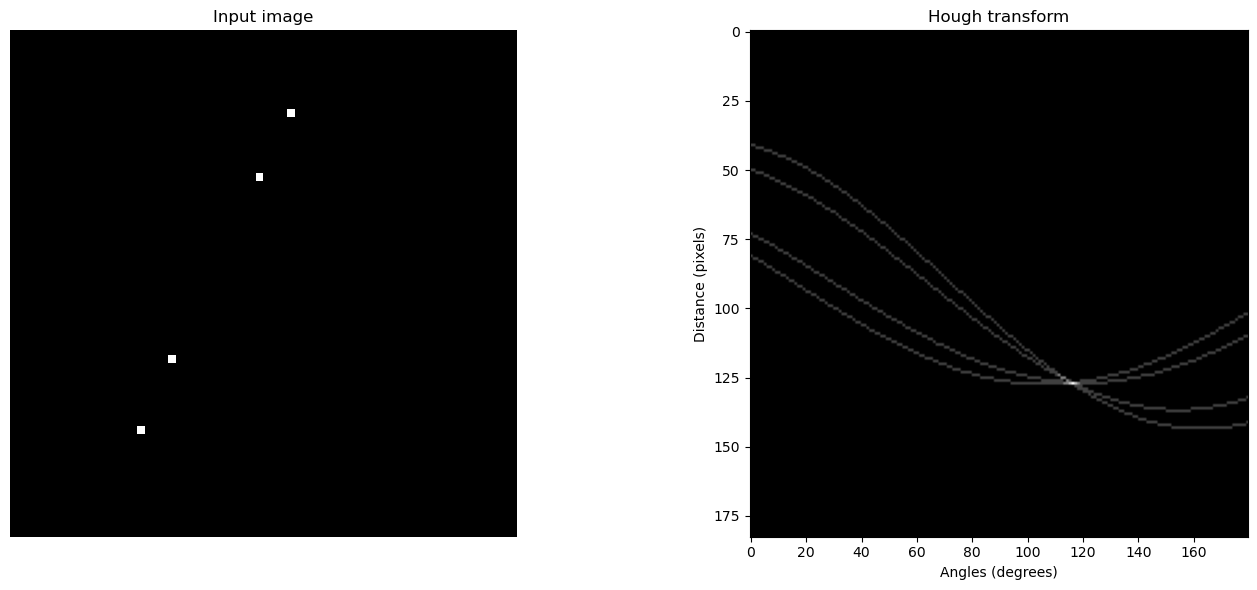

In [5]:
# dodatkowe punkty, dobrane tak, aby punkty były współliniowe
im[10, 35] = 1
im[50, 16] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)

#### Eksperymenty z różnymi układami punktów

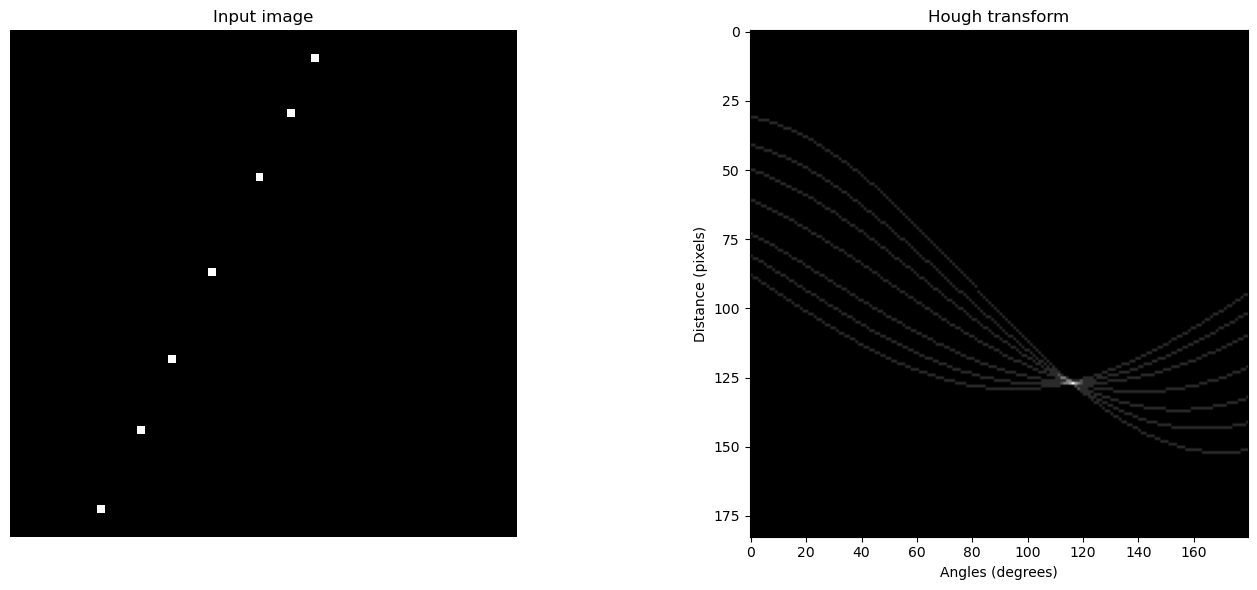

In [6]:
# coraz bliżej linii
im[3, 38] = 1
im[30, 25] = 1
im[60, 11] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)

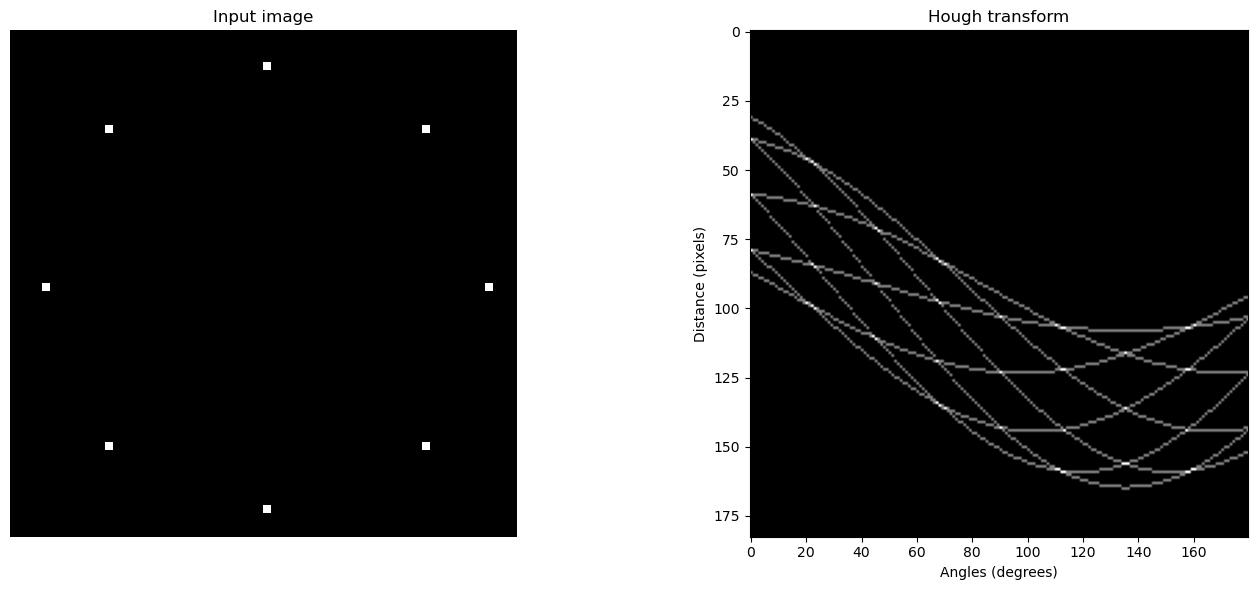

In [7]:
# rozłożenie na okręgu
im = np.zeros((64, 64), dtype=np.uint8)
im[4, 32] = 1
im[12, 52] = 1
im[32, 60] = 1
im[52, 52] = 1
im[60, 32] = 1
im[52, 12] = 1
im[32, 4] = 1
im[12, 12] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)

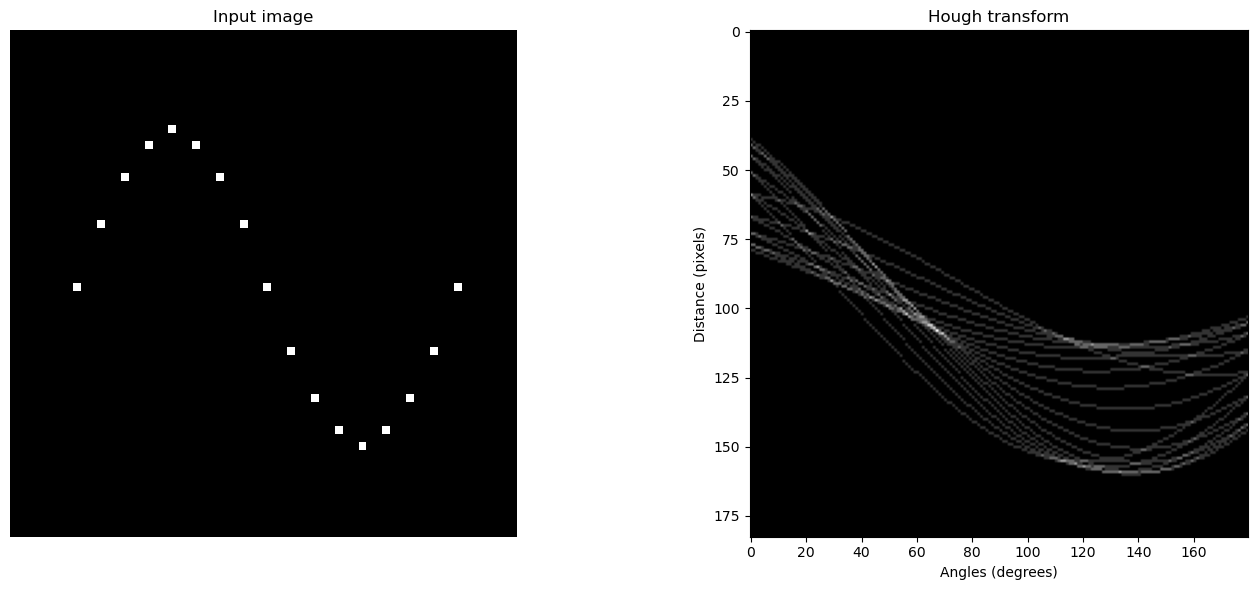

In [8]:
# sinusoida
im = np.zeros((64, 64), dtype=np.uint8)
im[32, 8] = 1
im[24, 11] = 1
im[18, 14] = 1
im[14, 17] = 1
im[12, 20] = 1
im[14, 23] = 1
im[18, 26] = 1
im[24, 29] = 1
im[32, 32] = 1
im[40, 35] = 1
im[46, 38] = 1
im[50, 41] = 1
im[52, 44] = 1
im[50, 47] = 1
im[46, 50] = 1
im[40, 53] = 1
im[32, 56] = 1

H, theta, rho = hough_line(im)
show_hough(H, im)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktyczne wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

1. Wczytaj obraz _kwadraty.png_. Wyświetl go.
2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne, aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno to być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
4. Wyświetl macierz _H_. Czy widoczna jest taka liczba maksimów, jakiej się spodziewamy?

(-0.5, 255.5, 255.5, -0.5)

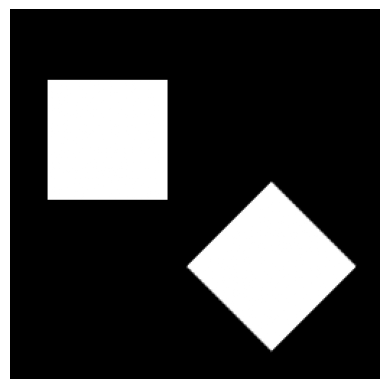

In [9]:
# wczytanie obrazu
kwadraty = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy wczytany obraz
plt.imshow(kwadraty, 'gray', vmin=0, vmax=256)
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

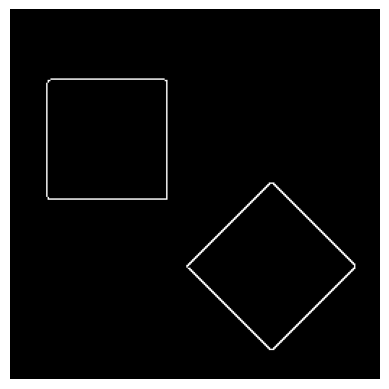

In [10]:
# detekcja krawędzi metodą gradientową - algorytm Canny
kwadratyBlur = cv2.GaussianBlur(kwadraty, (3, 3), 0.5)
kwadratyEdges = cv2.Canny(kwadratyBlur, 100, 200, None, 3, 1)

# wyświetlmy obraz po detekcji krawędzi
plt.imshow(kwadratyEdges, 'gray')
plt.axis('off')

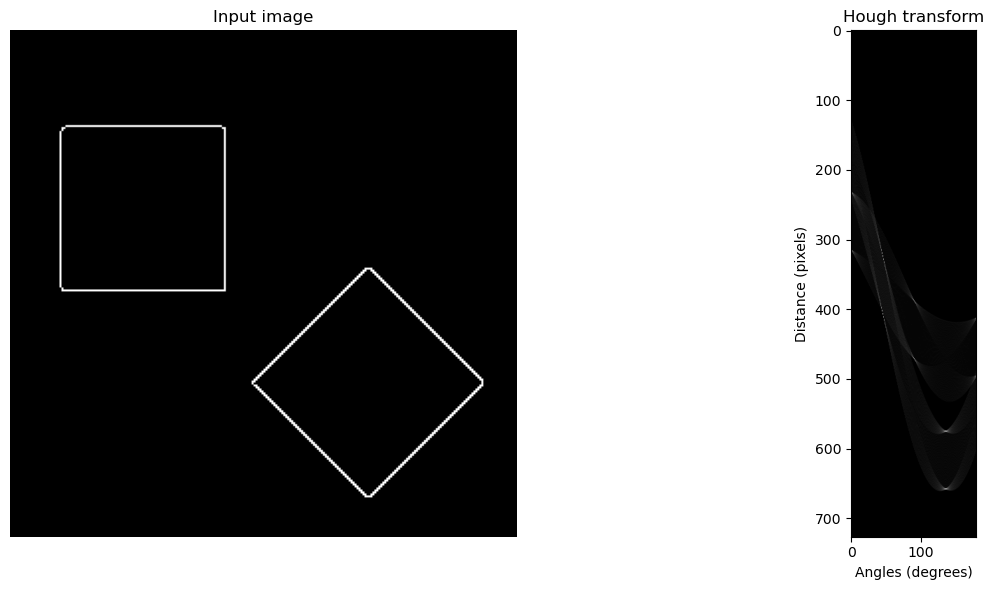

In [11]:
# transformata Hougha obrazu krawędziowego
H, theta, rho = hough_line(kwadratyEdges)

show_hough(H, kwadratyEdges)


---

#### Czy widoczna jest taka liczba maksimów, jakiej się spodziewamy?

Powiedziałbym, że nie do końca, sam obraz macierzy nie jest dość dobrze widoczny ze względu na dysproporcję wymiarów, również maksima na tym obrazie nie wyróżniają się aż tak mocno, udało mi się zaobserwować 5 maksimów. Jako że na obrazie jest 8 linii, możnaby się spodziewać 8 maksimów.

---


 5. W module _skimage.transform_ dostępna jest funkcja do automatycznej analizy przestrzeni Hougha (wyszukiwania maksimów) - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, wektory theta i rho). Dodatkowo można podać próg, powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyślnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H, używając poniższej konstrukcji.

In [12]:
maxH, maxTheta, maxRho = hough_line_peaks(H, theta, rho, num_peaks=8)

Taki zapis pozwoli na dołożenie adnotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie (x, y) o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka realizuje wywołanie:

`circle = plt.Circle((x, y), 10, color='r', fill=False)`,

natomiast dołożenie takiego okręgu do obrazu to:

`ax.add_patch(circle)`

Zaznacz maksima na obrazie, wykorzystując rezultat funkcji *hough\_line\_peaks* oraz biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2, gdzie r to pionowy rozmiar przestrzeni Hougha.

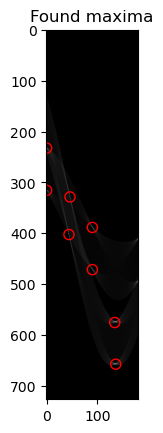

In [13]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(H, 'gray') # H jest tutaj przestrzenią Hougha

# zaznaczanie maksimów na obrazie
for thet, rh in zip(maxTheta, maxRho):
    x = 180 / np.pi * thet + 90
    y = rh + H.shape[0] / 2
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)

plt.title("Found maxima")
plt.show()

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Żadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki czteroelementowe ze współrzędnymi końców odcinków wykorzystanych do wyliczenia parametrów (czyli znalezienia prostej).
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na _graylevel_). Do wyświetlania linii wykorzystaj przykładowy poniższy kod.

In [14]:
# wczytanie obrazu bez konwersji na graylevel
kwadratyC = cv2.imread('kwadraty.png')

# wyznaczenie linii obecnych na obrazie krawędziowym
lines = cv2.HoughLines(kwadratyEdges, 1, np.pi / 180, 50)

rho = lines[:, 0, 0]
theta = lines[:, 0, 1]

In [15]:
a = np.cos(theta)
b = np.sin(theta)
x0 = a * rho
y0 = b * rho

# zmiana z int(...) na (...).astype(np.int32) ze względu na operacje na listach
x1 = (x0 + 1000 * (-b)).astype(np.int32)
y1 = (y0 + 1000 * a).astype(np.int32)
x2 = (x0 - 1000 * (-b)).astype(np.int32)
y2 = (y0 - 1000 * a).astype(np.int32)

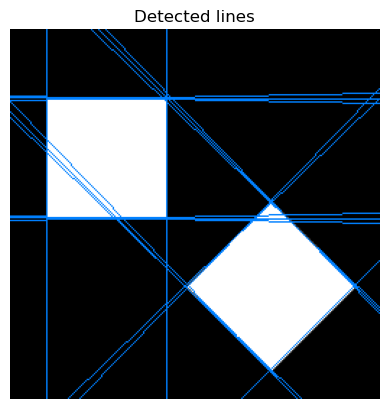

In [16]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for x1_, y1_, x2_, y2_ in zip(x1, y1, x2, y2):
    kwadratyC = cv2.line(kwadratyC, (x1_, y1_), (x2_, y2_), (0, 128, 255))

ax.imshow(kwadratyC)
plt.title("Detected lines")
plt.axis('off')
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na _graylevel_).

In [17]:
# wczytanie obrazu bez konwersji na graylevel
kwadratyC = cv2.imread('kwadraty.png')

# wyznaczenie odcinków obecnych na obrazie krawędziowym
sections = cv2.HoughLinesP(kwadratyEdges, 1, np.pi / 180, 40)

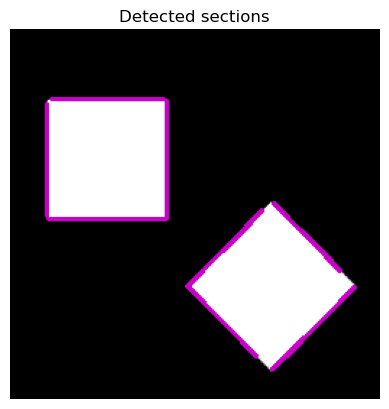

In [18]:
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for section in sections:
    x1, y1, x2, y2 = section[0]
    kwadratyC = cv2.line(kwadratyC, (x1, y1), (x2, y2), (200, 0, 200), 2)

ax.imshow(kwadratyC)
plt.title("Detected sections")
plt.axis('off')
plt.show()

### Transformata Hougha dla obrazu rzeczywistego

Bazując na kodzie stworzonym w poprzednim punkcie, wyszukamy linie na obrazie rzeczywistym.
1. Wczytaj obraz _lab112.png_. Wyświetl go.
2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzacja, detekcja krawędzi) wyodrębnij krawędzie samych kwadratów - tak, aby były jak najlepszej jakości (cienkie), jednocześnie eliminując z obrazu zakłócenia.
3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniej części wyrysuj na oryginalnym obrazie znalezione linie.

(-0.5, 639.5, 479.5, -0.5)

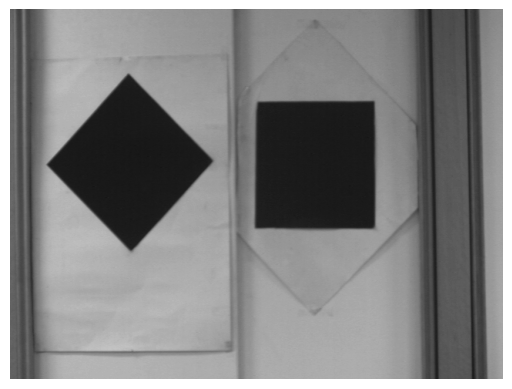

In [19]:
# wczytanie obrazu
lab112 = cv2.imread('lab112.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy wczytany obraz
plt.imshow(lab112, 'gray', vmin=0, vmax=256)
plt.axis('off')

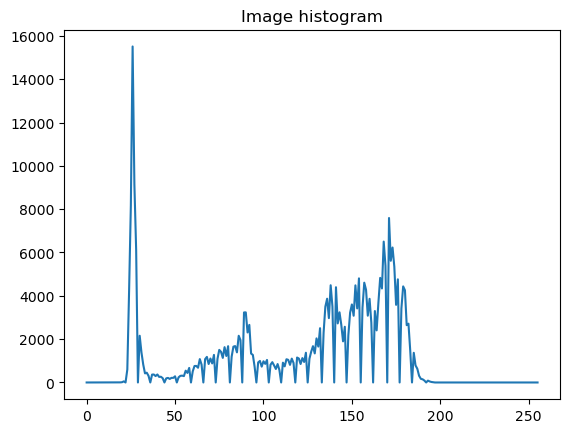

In [20]:
# I etap - badanie histogramu obrazu
lab112Hist = cv2.calcHist([lab112], [0], None, [256], [0, 256])

# wyświetlmy histogram
plt.plot(lab112Hist)
plt.title("Image histogram")
plt.show()

Analizując histogram, przyjmuję próg 40. Wydaje się to być rozsądną wartością, która pozwoli wyodrębnić ciemne kwadraty.

(-0.5, 639.5, 479.5, -0.5)

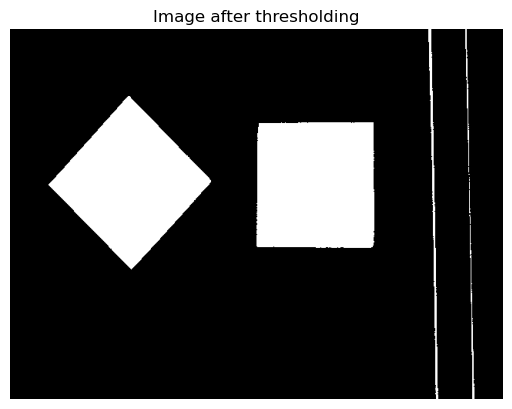

In [21]:
# II etap - binaryzacja
_, lab112Bin = cv2.threshold(lab112, 40, 255, cv2.THRESH_BINARY_INV)

# wyświetlmy obraz po binaryzacji
plt.imshow(lab112Bin, 'gray')
plt.title("Image after thresholding")
plt.axis('off')

Niestety pojawiły się "zakłócenia" w postaci linii po prawej stronie obrazu. Wykorzystanie operacji morfologicznej **otwarcia** powinno pomóc ich się pozbyć.

(-0.5, 639.5, 479.5, -0.5)

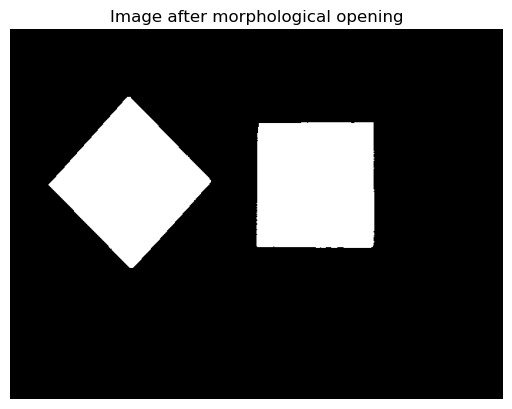

In [22]:
# III etap - operacja morfologiczna otwarcia
lab112BinOpen = cv2.morphologyEx(
    src=lab112Bin, 
    op=cv2.MORPH_OPEN, 
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT, (5, 1))
)

# wyświetlmy obraz po otwarciu
plt.imshow(lab112BinOpen, 'gray')
plt.title("Image after morphological opening")
plt.axis('off')

Finalnie, do tak przygotowanego obrazu zastosujmy wykrywanie krawędzi **algorytmem Canny** (przy okazji obraz zostanie też przefiltrowany).

(-0.5, 639.5, 479.5, -0.5)

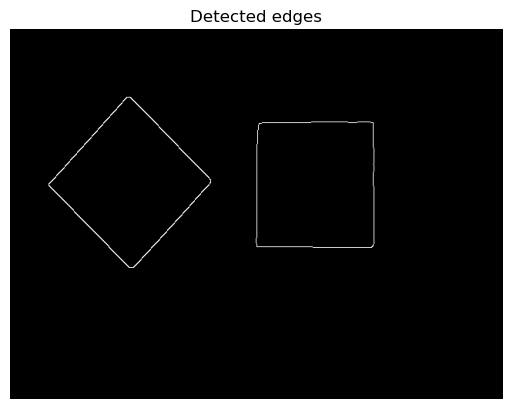

In [23]:
# IV etap - filtracja Gaussa + wykrywanie krawędzi
lab112BinOpenBlur = cv2.GaussianBlur(lab112BinOpen, (7, 7), 1.25)
lab112Edges = cv2.Canny(lab112BinOpenBlur, 100, 200, None, 3, 1)

# wyświetlmy finalny efekt
plt.imshow(lab112Edges, 'gray')
plt.title("Detected edges")
plt.axis('off')

In [24]:
H, theta, rho = hough_line(lab112Edges)
maxH, maxTheta, maxRho = hough_line_peaks(H, theta, rho, num_peaks=8)

a = np.cos(maxTheta)
b = np.sin(maxTheta)
x0 = a * maxRho
y0 = b * maxRho
x1 = (x0 + 1000 * (-b)).astype(np.int32)
y1 = (y0 + 1000 * a).astype(np.int32)
x2 = (x0 - 1000 * (-b)).astype(np.int32)
y2 = (y0 - 1000 * a).astype(np.int32)

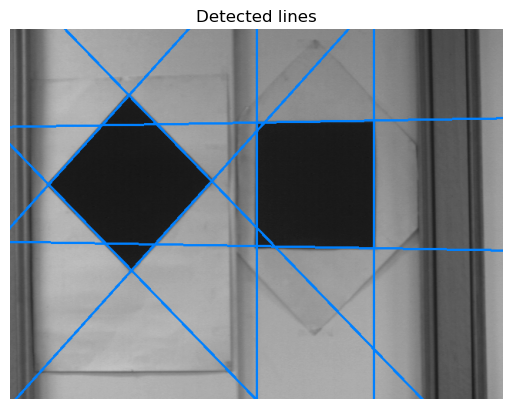

In [25]:
lab112C = cv2.imread('lab112.png')
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for x1_, y1_, x2_, y2_ in zip(x1, y1, x2, y2):
    lab112C = cv2.line(lab112C, (x1_, y1_), (x2_, y2_), (0, 128, 255), 2)

ax.imshow(lab112C)
plt.title("Detected lines")
plt.axis('off')
plt.show()

4. Wczytaj obraz _dom.png_. Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry, aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwagę dodatkowe parametry funkcji, takie jak: _minLineLength_, _maxLineGap_.

(-0.5, 556.5, 416.5, -0.5)

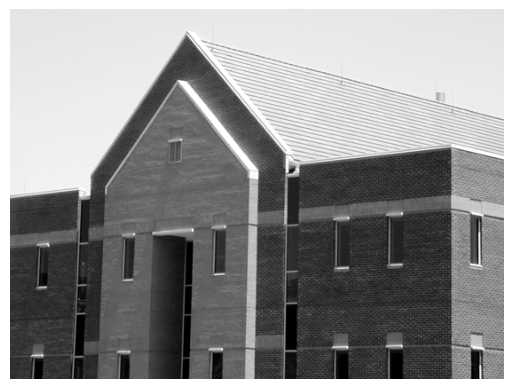

In [26]:
# wczytanie obrazu
dom = cv2.imread('dom.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy wczytany obraz
plt.imshow(dom, 'gray', vmin=0, vmax=256)
plt.axis('off')

(-0.5, 556.5, 416.5, -0.5)

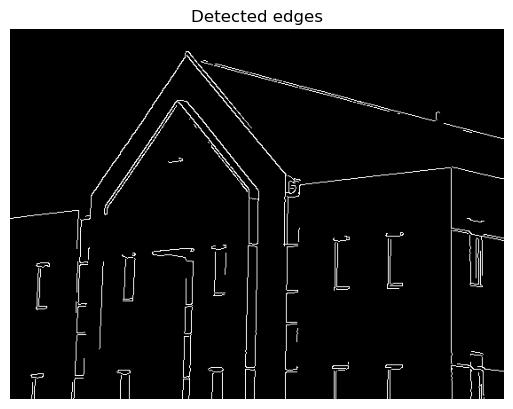

In [27]:
# przekształcenie obrazu - wykrycie krawędzi
domBlur = cv2.GaussianBlur(dom, (3, 3), 0)
domEdges = cv2.Canny(domBlur, 140, 200, None, 3, 1)

# wyświetlmy obraz po detekcji krawędzi
plt.imshow(domEdges, 'gray')
plt.title("Detected edges")
plt.axis('off')

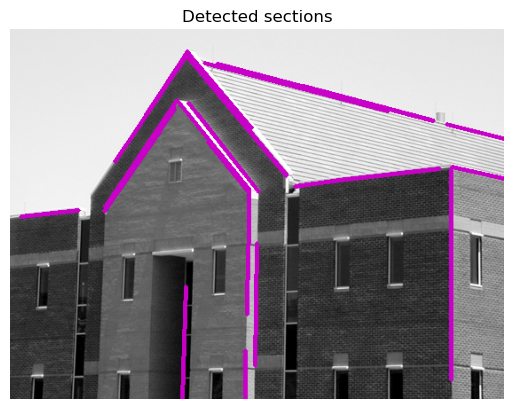

In [28]:
domC = cv2.imread('dom.png')
sections = cv2.HoughLinesP(domEdges, 1, np.pi / 180, 40, minLineLength=54, maxLineGap=4)
fig, ax = plt.subplots(1)
ax.set_aspect('equal')

for section in sections:
    x1, y1, x2, y2 = section[0]
    domC = cv2.line(domC, (x1, y1), (x2, y2), (200, 0, 200), 3)

ax.imshow(domC)
plt.title("Detected sections")
plt.axis('off')
plt.show()